The dataset is about IOT information based on the Devices used by the customers and the revenue generated by them in USD, where Segmentation is performed using KMeans clustering based on Age and Revenue generated in USD in a week.

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use ("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
# Reading the data

data1 = pd.read_csv("./Telecom IOT, Customer and Revenue Dataset/crm1.csv")
data2 = pd.read_csv("./Telecom IOT, Customer and Revenue Dataset/device1.csv")
data3 = pd.read_csv("./Telecom IOT, Customer and Revenue Dataset/rev1.csv")

In [3]:
data1.head(2)

,msisdn,gender,year_of_birth,system_status,mobile_type,value_segment
0,aeef4233d9ad34e41f7ecf48d64646f8,MALE,1985.0,ACTIVE,Prepaid,Tier_3
1,2397d009e705bc8a2654cbb3f480cc59,MALE,1958.0,ACTIVE,Prepaid,Tier_3


In [4]:
data2.head(2)

,msisdn,imei_tac,brand_name,model_name,os_name,os_vendor
0,c0e80ecc67484f293db0cf723146c9d6,7ce90a5469d6a07dc8c770956cc29482,SAMSUNG,GALAXY J1 ACE (SM-J111F),Android,Google
1,2bce0cd398cbc9b2478ecaf1ef62b2c1,110f73736e1e1fe0ef5cb8a581bc0ec2,WALTON,OLVIO L22,NaN,NaN


In [5]:
data3.head(2)

,msisdn,week_number,revenue_usd
0,66e94d24d8e0d5776a8a6b694782eff0,26,20.265621
1,66e94d24d8e0d5776a8a6b694782eff0,34,5.361164


In [6]:
# Creating a list of dataframes

data_m = [data1, data2, data3]

In [7]:
# Merging the dataframes on 'msisdn' column

df = reduce(lambda left, right: pd.merge(left, right, on =['msisdn']), data_m)
df.head()

,msisdn,gender,year_of_birth,system_status,mobile_type,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd
0,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.388883
1,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.570665
2,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.584760
3,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.272223
4,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.292059


In [8]:
df.shape

(213233, 13)

In [9]:
# Checking for null values

df.isnull().sum()

msisdn               0
gender           47013
year_of_birth       21
system_status        0
mobile_type          0
value_segment        0
imei_tac             0
brand_name        2006
model_name        2006
os_name          54226
os_vendor        52328
week_number          0
revenue_usd          0
dtype: int64

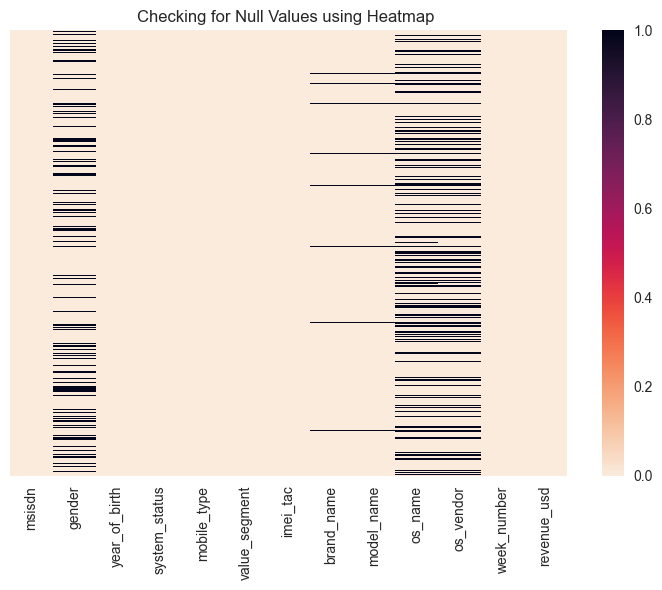

In [10]:
# Checking for null values using heatmap

sns.heatmap(df.isnull(), yticklabels=False,cbar=True, cmap = 'rocket_r')

plt.title("Checking for Null Values using Heatmap ")
plt.show()

In [11]:
# Checking for data types

df.dtypes

msisdn            object
gender            object
year_of_birth    float64
system_status     object
mobile_type       object
value_segment     object
imei_tac          object
brand_name        object
model_name        object
os_name           object
os_vendor         object
week_number        int64
revenue_usd      float64
dtype: object

In [12]:
df.describe()

,year_of_birth,week_number,revenue_usd
count,213212.000000,213233.000000,213233.000000
mean,1979.485765,28.748763,11.571637
std,11.279468,4.045829,6.026297
min,1918.000000,22.000000,0.017738
25%,1972.000000,25.000000,6.499899
50%,1982.000000,29.000000,11.529665
75%,1988.000000,32.000000,16.590840
max,2000.000000,35.000000,82.921033


##### Checking for Unique values

In [13]:
df.get('gender').unique()

array(['Male', nan, 'Female', 'MALE', 'FEMALE', 'M'], dtype=object)

In [14]:
df.get('os_name').unique()

array(['Android', 'Symbian OS', nan, 'Proprietary OS', 'Samsung OS',
       'Series30', 'iOS', 'Series40', 'SPREADTRUM OS', 'Nokia OS',
       'Windows phone', 'BADA', 'Tizen', 'MTK RTOS', 'Series60',
       'Asha Software', 'Siemens OS', 'LG OS', 'BELLE', 'ISA', 'NUCLEUS',
       'Yun OS', 'VRTXmc', 'Blackberry OS', 'MOCOR OS'], dtype=object)

In [15]:
df.get('brand_name').unique()

array(['SYMPHONY', 'HUAWEI', 'ITEL', 'SAMSUNG', 'NOKIA', 'WALTON',
       'LITEEL', 'LG', 'TITANIC MOBILE', 'WESTERN', 'LENOVO', 'LAVA',
       'XIAOMI', 'MAXIMUS', 'OPPO', 'DARAGO', 'RANGS', 'KINGSTAR',
       'SB TEL', 'APPLE', 'MICROMAX', nan, 'ONEPLUS', 'G-PHONE',
       'WINSTAR', 'WINMAX', 'PEACE', 'HTC', 'ZTE', 'ARCHOS', 'ERICSSON',
       'TECNO', 'IYOU', 'WIKO', 'TRIDENT', 'QPHONE', 'SMILE',
       'GREYMARKET', 'WALTON DIGI-TECH', 'MYCELL', 'LINNEX ELECTRONICS',
       'HOTWAV', 'ZELTA', 'J-MAX', 'VSUN', 'STRAWBERRY', 'OKAPIA',
       'KARBONN', 'BOPEL', 'INTEX', 'MICROSOFT', 'FIVE STAR', 'NAVTECH',
       'AAMRA', 'VIVO', 'TAUFIKA', 'ALCATEL', 'SMART', 'SONYERICSSON',
       'ZTK', 'TINMO', 'IMAM TELECOM', 'FISE', 'AIRMAX', 'HEDY', 'OCTENN',
       'LECOM', 'PHILIPS', 'SICO', 'JABLOCOM', 'SMARTA', 'AMOI', 'SPORTS',
       'KECHAO', 'ANYCOOL', 'BLUEBERRY', 'PHOENIX',
       'ADVANCED CHEMICAL INDUSTRIES LIMITED', 'ELITE', 'ASUS', 'COOLPAD',
       'LULU CENTER', 'LINNEX', 'FO

##### Frequency Count of Variables

In [16]:
df.dtypes

msisdn            object
gender            object
year_of_birth    float64
system_status     object
mobile_type       object
value_segment     object
imei_tac          object
brand_name        object
model_name        object
os_name           object
os_vendor         object
week_number        int64
revenue_usd      float64
dtype: object

In [17]:
var = ['gender', 'system_status', 'mobile_type', 'value_segment', 'brand_name', 'model_name', 'os_name', 'os_vendor' ]
for v in var:
    print('\nFrequency count for variable %s'%v)
    print(df[v].value_counts())
    print('---' * 20)


Frequency count for variable gender
Male      135320
Female     18744
MALE        9655
FEMALE      2269
M            232
Name: gender, dtype: int64
------------------------------------------------------------

Frequency count for variable system_status
ACTIVE     209331
SUSPEND      3902
Name: system_status, dtype: int64
------------------------------------------------------------

Frequency count for variable mobile_type
Prepaid     211558
Postpaid      1675
Name: mobile_type, dtype: int64
------------------------------------------------------------

Frequency count for variable value_segment
Tier_3    213233
Name: value_segment, dtype: int64
------------------------------------------------------------

Frequency count for variable brand_name
SAMSUNG      53724
SYMPHONY     41759
NOKIA        35119
WALTON        9346
HUAWEI        9264
             ...  
ICE PHONE        5
KIMFLY           5
HOPE             4
FORME            3
I KALL           2
Name: brand_name, Length: 233, dtype

In [18]:
# Replacing the Incorrect Data

df['gender'] = df['gender'].replace({'MALE': 'Male', 'FEMALE': 'Female', 'M': 'Male'})
df['gender'].value_counts()

Male      145207
Female     21013
Name: gender, dtype: int64

In [19]:
# Creating new feature

df['Age'] = (2023 - df['year_of_birth'])

##### Dropping unwanted columns from the dataframe

In [20]:
df.drop(['value_segment', 'model_name', 'imei_tac', 'os_vendor', 'week_number'], axis=1, inplace=True)

In [21]:
df.head()

,msisdn,gender,year_of_birth,system_status,mobile_type,brand_name,os_name,revenue_usd,Age
0,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,SYMPHONY,Android,8.388883,35.0
1,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,SYMPHONY,Android,4.570665,35.0
2,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,SYMPHONY,Android,19.584760,35.0
3,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,SYMPHONY,Android,9.272223,35.0
4,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,SYMPHONY,Android,13.292059,35.0


In [22]:
# Filling Null Values for Numeric Variable

df['Age'] = df['Age'].fillna(df['Age'].mean())

In [23]:
# Filling Null Values for Categorical Variables

df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['os_name'] = df['os_name'].fillna(df['os_name'].mode()[0])
df['brand_name'] = df['brand_name'].fillna(df['brand_name'].mode()[0])

In [24]:
df.dtypes

msisdn            object
gender            object
year_of_birth    float64
system_status     object
mobile_type       object
brand_name        object
os_name           object
revenue_usd      float64
Age              float64
dtype: object

In [25]:
# Changing data type

df['Age'] = df['Age'].astype(int)

In [26]:
# Dropping other Columns

df.drop(['msisdn', 'year_of_birth', 'brand_name', 'os_name'], axis=1, inplace=True)

In [27]:
# Removing Duplicate values

df.drop_duplicates(inplace=True)

In [28]:
df.isnull().sum()

gender           0
system_status    0
mobile_type      0
revenue_usd      0
Age              0
dtype: int64

In [29]:
df.head(3)

,gender,system_status,mobile_type,revenue_usd,Age
0,Male,ACTIVE,Prepaid,8.388883,35
1,Male,ACTIVE,Prepaid,4.570665,35
2,Male,ACTIVE,Prepaid,19.584760,35


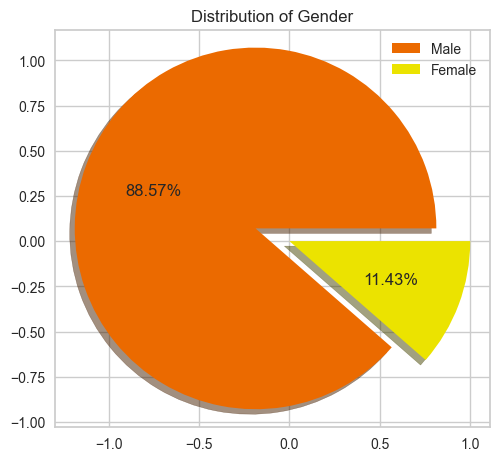

In [30]:
plt.figure(figsize = (5,5))

labels = ['Male','Female']
colors = ['#eb6a00', '#ebe300']
my_explode = [0.2, 0]
plt.pie(df['gender'].value_counts(), autopct='%0.2f%%', colors=colors, explode = my_explode, shadow =True, frame = True, )

plt.title('Distribution of Gender', size=12)
plt.legend(labels, loc= 'best')
plt.show()

Most of the Revenue generated in trough Male users which is about 89 % of total users

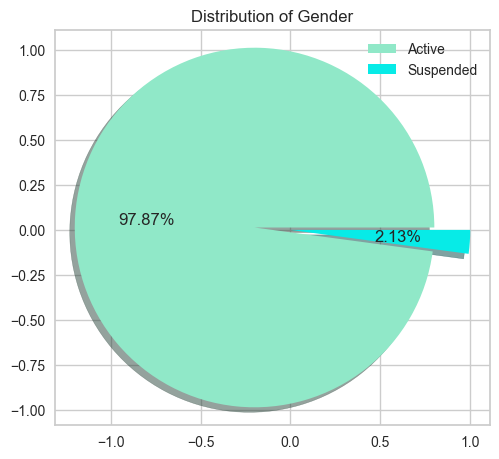

In [31]:
plt.figure(figsize = (5,5))

labels = ['Active','Suspended']
colors = ['#90e8c8', '#07ebe7']
my_explode = [0.2, 0]
plt.pie(df['system_status'].value_counts(), autopct='%0.2f%%', colors=colors, explode = my_explode, shadow =True, frame = True, )

plt.title('Distribution of Gender', size=12)
plt.legend(labels, loc= 'best')
plt.show()

98% systems are active, while others are suspended

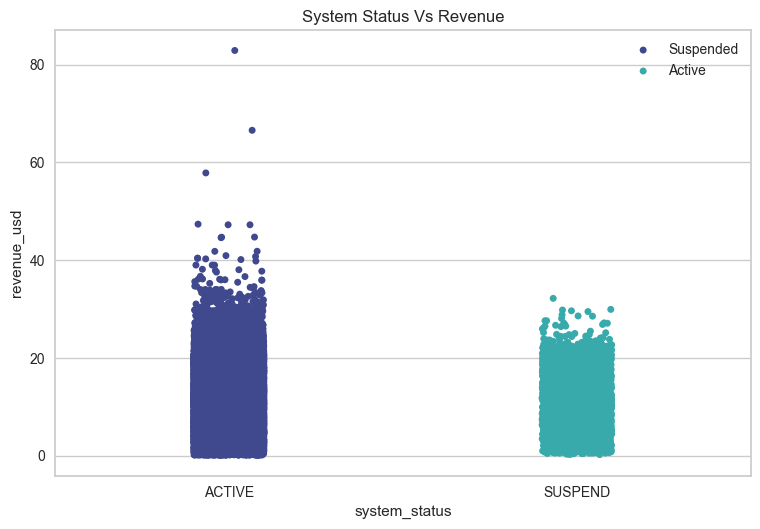

In [32]:
sns.stripplot(data =df, x = df['system_status'], y =df['revenue_usd'], palette = 'mako')

plt.title("System Status Vs Revenue")
plt.legend(labels = ['Suspended', 'Active'])
plt.show()

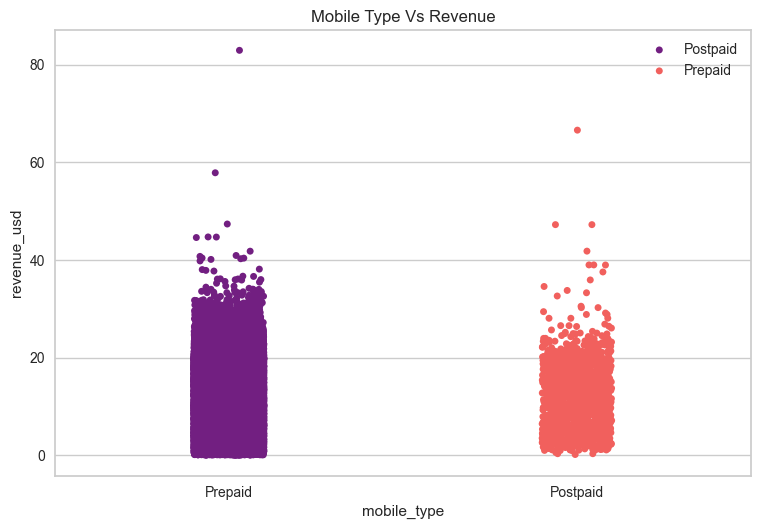

In [33]:
sns.stripplot(data =df, x = df['mobile_type'], y =df['revenue_usd'], palette = 'magma')

plt.title("Mobile Type Vs Revenue")
plt.legend(labels = ['Postpaid', 'Prepaid'])
plt.show()

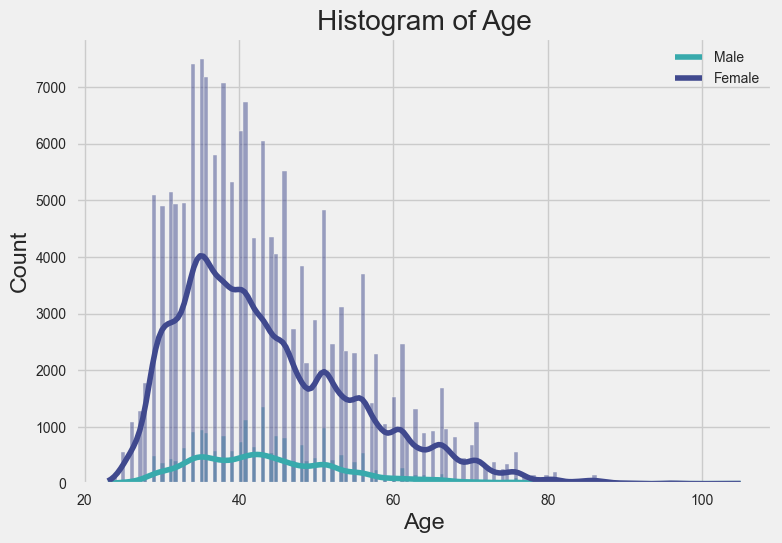

In [34]:
plt.style.use ("fivethirtyeight")

sns.histplot(data=df, x = 'Age', hue = 'gender', palette='mako', kde =True)
plt.legend(labels=['Male', 'Female'])

plt.title("Histogram of Age")
plt.show()

In [35]:
df.describe()

,revenue_usd,Age
count,179791.000000,179791.000000
mean,11.553446,43.555000
std,6.028949,11.318354
min,0.017738,23.000000
25%,6.469961,35.000000
50%,11.517867,41.000000
75%,16.579588,51.000000
max,82.921033,105.000000


In [36]:
# Mapping Categorical Variables

df['gender'] = df['gender'].map({'Female':0, 'Male':1})
df['system_status'] = df['system_status'].map({'SUSPEND':0, 'ACTIVE':1})
df['mobile_type'] = df['mobile_type'].map({'Prepaid':0, 'Postpaid':1})

In [37]:
df.sample(3)

,gender,system_status,mobile_type,revenue_usd,Age
107360,0,1,0,9.205716,36
54064,0,1,0,10.431844,53
42624,1,1,0,7.759120,35


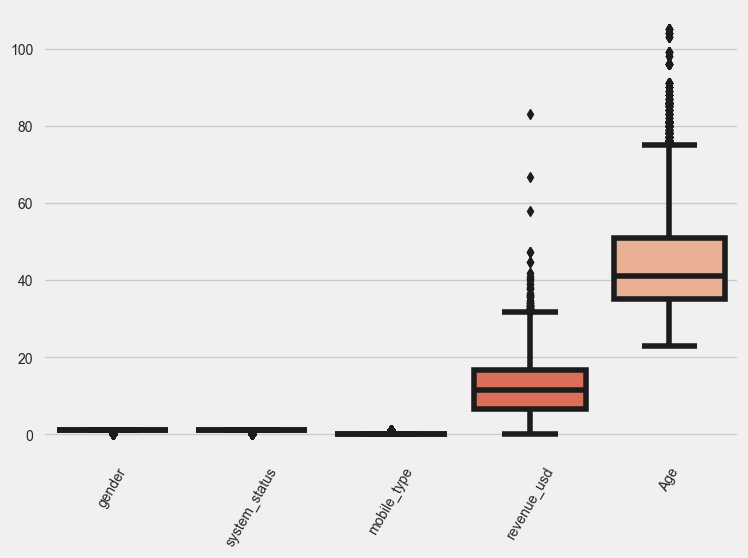

In [38]:
# Checking for Outliers through Boxplots

sns.boxplot(data=df, palette='rocket')
plt.xticks(rotation=60)
plt.show()

##### Applying Inter Quartile Range (IQR) to eliminate Outliers

In [39]:
# Removing Outliers from 'Age'

Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5* IQR
upper_limit = Q3 + 1.5* IQR

#lower_limit, upper_limit

df = df[(df['Age']>= lower_limit) & (df['Age']<= upper_limit)]
df.shape

(177742, 5)

In [40]:
# Removing Outlier from 'revenue'

Q1 = df.revenue_usd.quantile(0.25)
Q3 = df.revenue_usd.quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5* IQR
upper_limit = Q3 + 1.5* IQR

#lower_limit, upper_limit

df = df[(df['revenue_usd']>= lower_limit) & (df['revenue_usd']<= upper_limit)]
df.shape

(177661, 5)

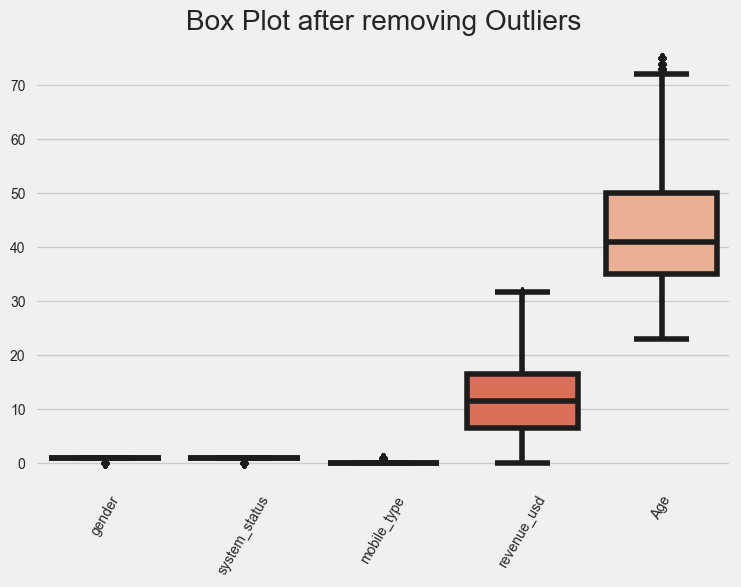

In [41]:
# Box Plot after removing Outliers

sns.boxplot(data=df, palette='rocket')
plt.xticks(rotation=60)
plt.title("Box Plot after removing Outliers")
plt.show()

In [42]:
df.head()

,gender,system_status,mobile_type,revenue_usd,Age
0,1,1,0,8.388883,35
1,1,1,0,4.570665,35
2,1,1,0,19.584760,35
3,1,1,0,9.272223,35
4,1,1,0,13.292059,35


In [43]:
# Scaling the Data using MinMaxScaler

In [44]:
mm = MinMaxScaler()
scaled_data = mm.fit_transform(df)

new_df = pd.DataFrame(scaled_data, columns = df.columns)
new_df.head()

,gender,system_status,mobile_type,revenue_usd,Age
0,1.0,1.0,0.0,0.263876,0.230769
1,1.0,1.0,0.0,0.143518,0.230769
2,1.0,1.0,0.0,0.616793,0.230769
3,1.0,1.0,0.0,0.291720,0.230769
4,1.0,1.0,0.0,0.418434,0.230769


In [45]:
# Applying KMeans Model

In [46]:
inertia = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    kmeans.fit(new_df)
    inertia.append(kmeans.inertia_)
    
frame = pd.DataFrame({'Cluster': range(1, 15), 'Inertia': inertia})
frame

,Cluster,Inertia
0,1,36812.191372
1,2,18792.591753
2,3,14078.888127
3,4,10756.082916
4,5,7777.848195
...,...,...
9,10,3991.760349
10,11,3612.151458
11,12,3294.392482
12,13,3060.129913


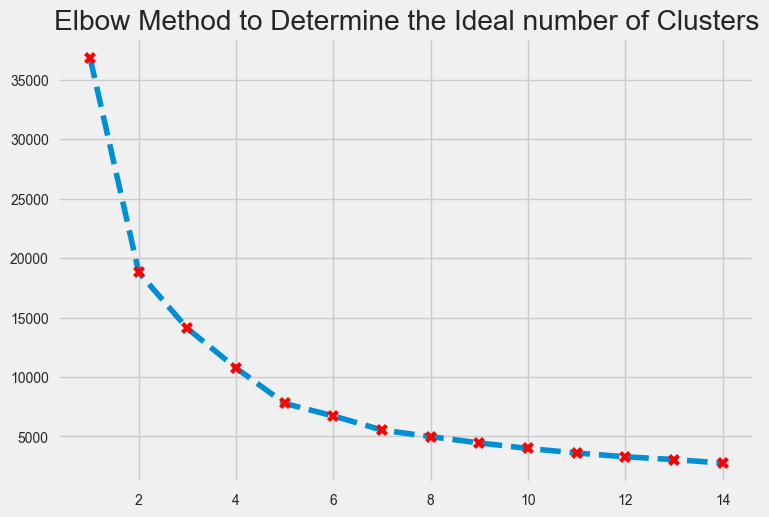

In [47]:
plt.style.use ("fivethirtyeight")
plt.plot(frame['Cluster'], frame['Inertia'], ls='dashed',  marker = 'X', markerfacecolor='red', markersize=9)

plt.title("Elbow Method to Determine the Ideal number of Clusters")
plt.show()

##### Optimal Value is 5 clusters

In [48]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init='random', max_iter = 300, random_state=42)
    kmeans.fit(new_df)
    score = silhouette_score(new_df, kmeans.labels_, metric='euclidean')
    silhouette_coefficients.append (score)

In [49]:
score

0.3454696480972796

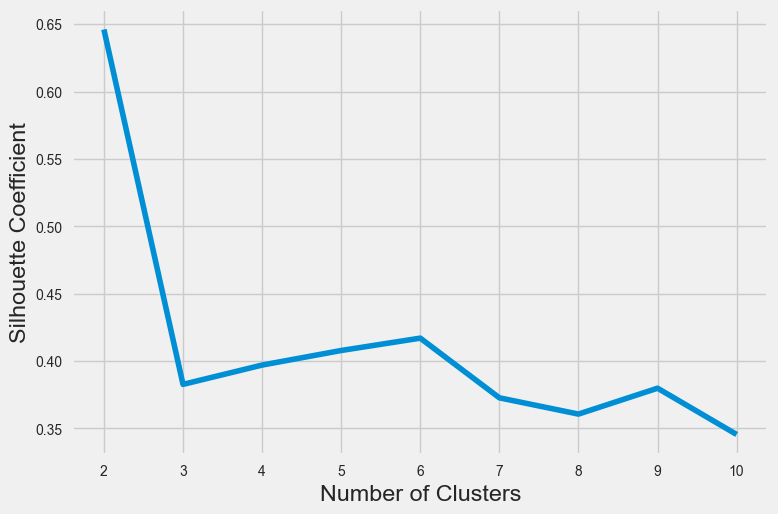

In [50]:
# Plotting the Silhoutte results:

plt.plot (range (2, 11), silhouette_coefficients)
plt.xticks (range (2, 11))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Silhouette Coefficient")
plt.show ()

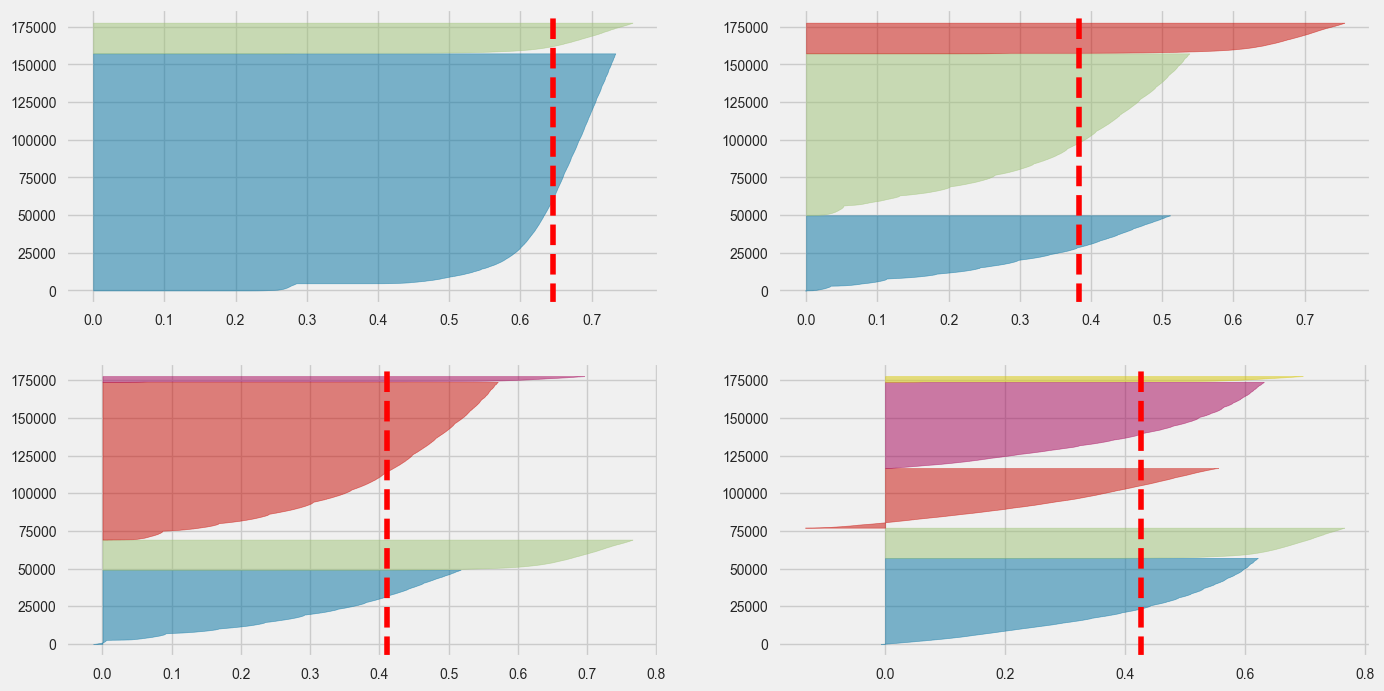

In [54]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2,3,4,5]:
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(new_df) 

Observations from Silhoutte Visuaizer:

1. The silhouette score for each 2 and 3 for n_clusters cluster is above average silhouette scores.
2. Also, The thickness of the silhouette plot representing each cluster also is a deciding point.
3. For plot with n_cluster 5, the thickness is more uniform than the other plots with clusters.
4. Thus, one can select the optimal number of clusters as 5.

In [55]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(new_df)

centroids = kmeans.cluster_centers_
print(centroids)

labels = kmeans.labels_
print(labels)

[[ 1.00000000e+00  1.00000000e+00  6.68092867e-03  5.33708061e-01
   2.88316198e-01]
 [ 1.06359366e-13  1.00000000e+00  1.64802237e-03  3.62896148e-01
   3.99230539e-01]
 [ 1.00000000e+00  1.00000000e+00  1.46274916e-02  3.56130125e-01
   6.72978299e-01]
 [ 1.00000000e+00  1.00000000e+00  5.62543676e-03  1.98585759e-01
   2.85020561e-01]
 [ 9.15478077e-01 -1.57651669e-14 -8.23993651e-17  3.66115069e-01
   3.61646146e-01]]
[3 3 0 ... 2 2 2]


In [56]:
cluster_kmeans = kmeans.labels_
df['Cluster'] = cluster_kmeans
df.sample(5)

,gender,system_status,mobile_type,revenue_usd,Age,Cluster
37615,1,1,0,3.475102,30,3
159986,1,1,0,18.928571,29,0
132249,1,1,0,2.341725,58,2
134853,1,1,0,18.443511,36,0
36073,1,1,0,3.240922,40,3


In [57]:
df['Cluster'] = df['Cluster'] + 1

In [58]:
labels

array([3, 3, 0, ..., 2, 2, 2])

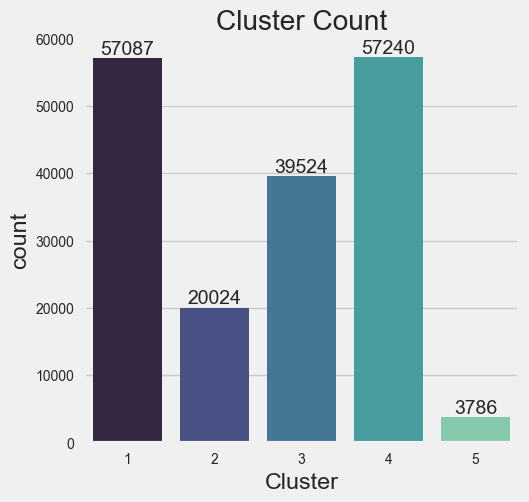

In [59]:
plt.figure (figsize = (5 , 5))
plt.style.use ("fivethirtyeight")

ax = sns.countplot(data = df, x = df['Cluster'], palette = 'mako')
for i in ax.containers:
    ax.bar_label(i)

plt.title("Cluster Count")
plt.show()

In [60]:
df.groupby('Cluster').mean()

,gender,system_status,mobile_type,revenue_usd,Age
Cluster,,,,,
1,1.000000,1.0,0.006692,16.941615,37.985356
2,0.000000,1.0,0.001648,11.530187,43.759988
3,1.000000,1.0,0.014599,11.329359,58.007261
4,1.000000,1.0,0.005643,6.309646,37.840199
5,0.915478,0.0,0.000000,11.632303,41.805600


In [61]:
df.iloc[:,3:].groupby('Cluster').mean()

,revenue_usd,Age
Cluster,,
1,16.941615,37.985356
2,11.530187,43.759988
3,11.329359,58.007261
4,6.309646,37.840199
5,11.632303,41.805600


<Figure size 500x500 with 0 Axes>

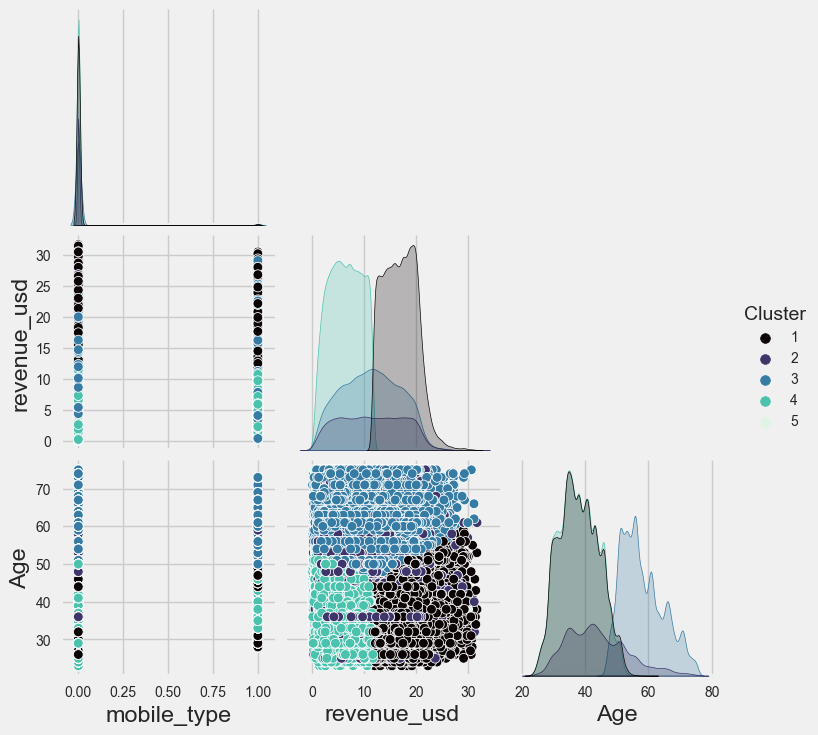

In [62]:
plt.figure(figsize=(5,5))
sns.pairplot(df.iloc[:,2:], hue = "Cluster", corner = True, palette ='mako')
plt.show()

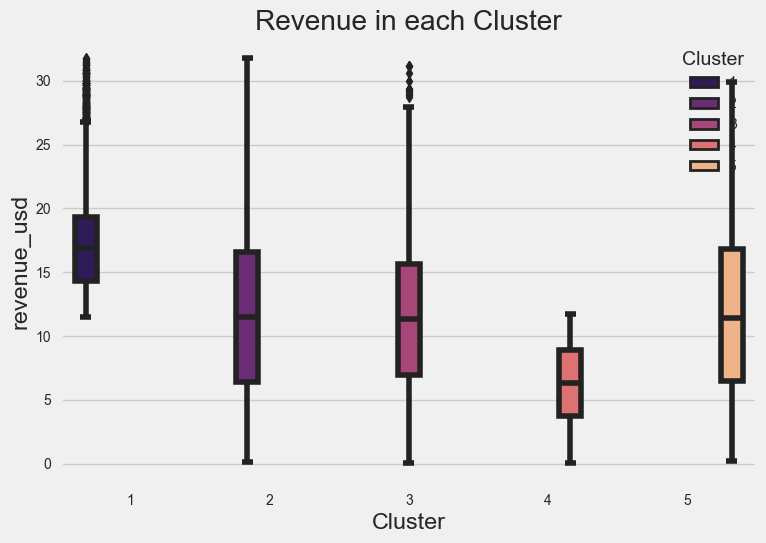

In [63]:
sns.boxplot(data = df, x = "Cluster", y = "revenue_usd", hue = "Cluster", palette = 'magma')

plt.title("Revenue in each Cluster")
plt.show()

In [64]:
print ("Davies-Bouldin score is :" , metrics.davies_bouldin_score(new_df, df['Cluster']))

Davies-Bouldin score is : 0.7041848379051379


Davies-Bouldin score:

The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering.

In [65]:
df.head()

,gender,system_status,mobile_type,revenue_usd,Age,Cluster
0,1,1,0,8.388883,35,4
1,1,1,0,4.570665,35,4
2,1,1,0,19.584760,35,1
3,1,1,0,9.272223,35,4
4,1,1,0,13.292059,35,1


In [66]:
x = df.iloc[:,[3, 4]].values
y = kmeans.fit_predict(x)

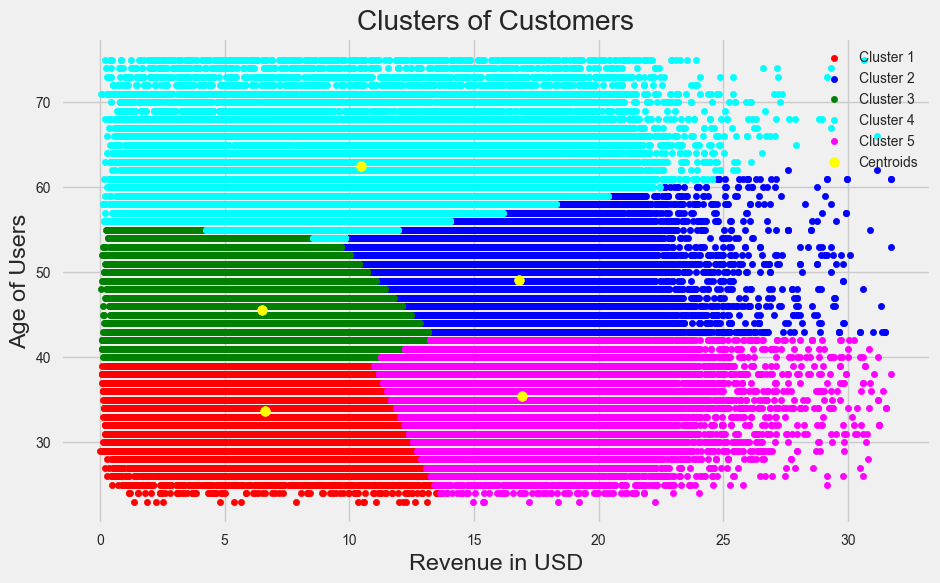

In [67]:
plt.figure(figsize=(10,6))

plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(x[y == 3, 0], x[y == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y == 4, 0], x[y == 4, 1], s = 20, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Revenue in USD')
plt.ylabel('Age of Users')
plt.legend()
plt.show()